# Homework06

Some exercises with image and audio data preparation.

## Goals

- Even more practice with lists
- Get familiar with pandas `DataFrames`
- Practice dataset exploration and normalization/scaling
- Set up a dataset for proper classification

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework

In [1]:
!wget -q https://github.com/PSAM-5020-2025F-A/5020-utils/raw/main/src/audio_utils.py
!wget -q https://github.com/PSAM-5020-2025F-A/5020-utils/raw/main/src/data_utils.py
!wget -q https://github.com/PSAM-5020-2025F-A/5020-utils/raw/main/src/image_utils.py

!wget -q https://github.com/PSAM-5020-2025F-A/Homework04/raw/main/Homework04_utils.pyc
!wget -q https://github.com/PSAM-5020-2025F-A/Homework05/raw/main/Homework05_utils.pyc

!wget -qO- https://github.com/PSAM-5020-2025F-A/5020-utils/releases/latest/download/forest-tree.tar.gz | tar xz
!wget -qO- https://github.com/PSAM-5020-2025F-A/5020-utils/releases/latest/download/instruments.tar.gz | tar xz

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from image_utils import make_image, get_pixels

from Homework06_utils import AwesomeAudioClassifier, AwesomeImageClassifier

AUDIO_PATH = "./data/audio/instruments/test"
IMAGE_PATH = "./data/image/forest-tree/test"

## More Image/Audio Classification

We're going to re-visit the classification exercises from `Homework04` and `Homework05`.

This exercise is a bit different though. In some ways it's the opposite of the previous exercises because we'll already have classification models ready to be used, but will have to normalize and standardize our dataset in order to run them. This is more representative of the type of work that goes into using real, pre-trained, ML models in the wild.

### The Models

We have two `Awesome` models, one for audio classification (`AwesomeAudioClassifier`), and one for image classification (`AwesomeImageClassifier`).

Unlike the classification models we set up for `Homework04` and `Homework05`, these models have more strict requirements about the shape and values of their input data. We can't run them on the files as they are.

### The Data

Audio and Image files are in the `data/audio/` and `data/image/` directories respectively.

We will use the `get_training_data()` from each of our classifiers to get the initial training data and labels for our audio and image files.

### The Features

This is the challenging part.

The data returned by `get_training_data()` is a representation of the content of the audio and image files, but it hasn't been processed or normalized in order to be used by the classifier models provided.

We can try to create a `DataFrame` directly from those, and it might seem like it works, but if we take a look at the result we'll see some `NaN` (Not-a-Number) values in some of the columns, and if we send that to the model it will barf and complain about having `NaN`s in the data.

This happens because all of the audios and images have different sizes. Hoooray !!

Welcome to Machine Learning. This is probably where most of the time in any ML project is spent: cleaning up data and making sure it has the right format, size and shape that a model expects.

For this exercise it won't be too hard to fix these.

Let's start with the audio files since they're one-dimensional, and once we have the audio modeling working we'll come back to the image files.

<div style="background:#040; padding:10px; width:calc(100% - 28px)">

## Audio Data

Let's run `AwesomeAudioClassifier.get_training_data()` function to get some audio data. This function returns audio data and labels from files inside a specified directory.

</div>

In [3]:
features, labels = AwesomeAudioClassifier.get_training_data(AUDIO_PATH)

### Audio Features

The audio data returned is actually in the frequency domain and is not samples, so even though we can't play these audio files, we can still plot this data and will have to normalize and clean it before we can run it through our classifier.

Let's take a look at this data.

What are the labels ? How many records do we have ? How many features do we have in each record ? Can we plot our data ?

Number of records: 79
Number of features: 43543


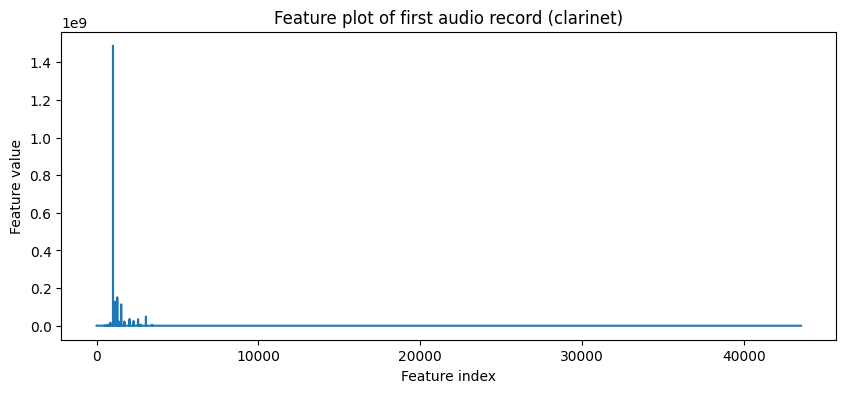

In [4]:
# Get the features and labels
features, labels = AwesomeAudioClassifier.get_training_data(AUDIO_PATH)

# Convert to DataFrame for easier inspection
df_audio = pd.DataFrame(features)

# How many records (rows) do we have?
num_records = df_audio.shape[0]
print("Number of records:", num_records)

# How many features (columns) does each record have?
num_features = df_audio.shape[1]
print("Number of features:", num_features)

# Plot some features from the first audio record
plt.figure(figsize=(10,4))
plt.plot(df_audio.iloc[0])  # plot first record's features
plt.title(f"Feature plot of first audio record ({labels[0]})")
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.show()


### Looks like data !

Looks like audio frequency-domain data to be more specific.

If we were to follow some of the data exploration steps we saw in class we would want to put this data in a `DataFrame` in order to get calculate some of its statistical properties, and maybe scale/normalize it before we use it in a classifier model.

Let's try it:

In [5]:
features_df = pd.DataFrame(features)
features_df

,0,1,2,3,4,5,6,7,8,9,...,43533,43534,43535,43536,43537,43538,43539,43540,43541,43542
0,365276.0,9142.0,15698.0,4560.0,2568.0,5337.0,8519.0,4561.0,2184.0,2310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,478.0,727.0,338.0,24.0,19.0,13.0,6.0,12.0,11.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16147157.0,2084192.0,682.0,155.0,547.0,53.0,8.0,2785.0,6829.0,645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14136394.0,1554687.0,352.0,10.0,67.0,550.0,1933.0,1559.0,1288.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16320957.0,3346669.0,8261.0,736.0,10.0,81.0,4.0,364.0,66.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,1398985.0,200202.0,11.0,18.0,19.0,4.0,0.0,10.0,77.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,55.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,97490.0,28472.0,476.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like it works, but when we look closely at the `DataFrame`, specially if we look at the features that are further to the right, we'll see our problem: `NaN` values.

As previously mentioned, this happens because the length of our features is different for each file.

### Fix Audio Data

Let's fix this by making all of the feature lists have the same length. We can either pad the short ones or slice the longer ones to have the same length as the shortest feature list. The second option is preferable since padding would require adding information to the dataset and that might have side effects.

So, we'll go through the lists of lists, create a list of lengths and find the smallest length.

Then, we'll iterate through the lists of lists and slice all the feature lists to have the same length.

In [6]:
# Find the length of each feature list
lengths = [len(f) for f in features]

# Find the minimum length
min_len = min(lengths)
print("Shortest feature length:", min_len)

# Slice all feature lists to have the same length
features_fixed = [f[:min_len] for f in features]

# Convert to DataFrame again
df_audio_fixed = pd.DataFrame(features_fixed)
print("Fixed feature DataFrame shape:", df_audio_fixed.shape)


Shortest feature length: 43000
Fixed feature DataFrame shape: (79, 43000)


A `DataFrame` created using the cropped features should look more consistent now.

In [8]:
# Create DataFrame using the fixed/cropped features
features_df = pd.DataFrame(features_fixed)
features_df


,0,1,2,3,4,5,6,7,8,9,...,42990,42991,42992,42993,42994,42995,42996,42997,42998,42999
0,365276.0,9142.0,15698.0,4560.0,2568.0,5337.0,8519.0,4561.0,2184.0,2310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,478.0,727.0,338.0,24.0,19.0,13.0,6.0,12.0,11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16147157.0,2084192.0,682.0,155.0,547.0,53.0,8.0,2785.0,6829.0,645.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,900.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14136394.0,1554687.0,352.0,10.0,67.0,550.0,1933.0,1559.0,1288.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16320957.0,3346669.0,8261.0,736.0,10.0,81.0,4.0,364.0,66.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1398985.0,200202.0,11.0,18.0,19.0,4.0,0.0,10.0,77.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,55.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,97490.0,28472.0,476.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bonus: Empty features

We've removed the `NaN` values, but it seems like we have a lot of columns that are all zeros or nearly all zeros.

While it's not necessary, we could also remove these in order to speed up the modeling later.

In [9]:
# Find columns where the sum is at least 100
non_empty_cols = features_df.columns[features_df.sum() >= 100]

# Keep only these columns
features_df_clean = features_df[non_empty_cols]

# Check the shape after removing empty columns
print("Shape after removing empty columns:", features_df_clean.shape)

# Display the cleaned DataFrame
features_df_clean


Shape after removing empty columns: (79, 8805)


,0,1,2,3,4,5,6,7,8,9,...,21806,24000,24002,25434,25435,25436,25437,25438,25439,28984
0,365276.0,9142.0,15698.0,4560.0,2568.0,5337.0,8519.0,4561.0,2184.0,2310.0,...,4.0,28.0,9.0,0.0,1.0,1.0,1.0,1.0,1.0,99.0
1,478.0,727.0,338.0,24.0,19.0,13.0,6.0,12.0,11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16147157.0,2084192.0,682.0,155.0,547.0,53.0,8.0,2785.0,6829.0,645.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,900.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14136394.0,1554687.0,352.0,10.0,67.0,550.0,1933.0,1559.0,1288.0,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16320957.0,3346669.0,8261.0,736.0,10.0,81.0,4.0,364.0,66.0,23.0,...,252.0,0.0,0.0,295.0,1367.0,2830.0,3127.0,1923.0,591.0,0.0
75,1398985.0,200202.0,11.0,18.0,19.0,4.0,0.0,10.0,77.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,55.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,97490.0,28472.0,476.0,4.0,0.0,0.0,6.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Run the Model

Now that we have a `DataFrame` with consistent rows, we can fit and evaluate our model.

The next cell runs the pre-defined classification model, fitting it with our `features_df` `DataFrame` and then reports the accuracy of our model.

We just have to run it.

In [10]:
# Fit the classifier and report training accuracy
AwesomeAudioClassifier.fit(features_df, labels)

training accuracy: {'clarinet': 0.71429, 'guitar': 0.7, 'piano': 1.0, 'overall': 0.80476}


### Scale / Normalize

Hmmm.... it runs, but we can do better.

We saw in class that normalizing/rescaling our features can help us find actual patterns in our data. It also helps models find patterns.

Try scaling the `DataFrame` using either a `MinMaxScaler` or a `StandardScaler` object.

In [12]:

# Choose one scaler
scaler = MinMaxScaler()   # scales features to [0, 1]
# scaler = StandardScaler()  # scales features to mean 0, std 1

# Fit the scaler and transform the DataFrame
features_scaled = scaler.fit_transform(features_df_clean)

# Convert back to DataFrame for easier handling
features_scaled_df = pd.DataFrame(features_scaled, columns=features_df_clean.columns)

# Check first few rows
features_scaled_df.head()


,0,1,2,3,4,5,6,7,8,9,...,21806,24000,24002,25434,25435,25436,25437,25438,25439,28984
0,0.004437,0.000783,1.000000,1.000000,0.997669,1.000000,1.000000,1.000000,0.319813,1.000000,...,0.015873,0.54902,0.290323,0.0,0.000732,0.000353,0.00032,0.00052,0.001692,1.0
1,0.000006,0.000062,0.021531,0.005263,0.007382,0.002436,0.000704,0.002631,0.001611,0.024242,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
2,0.196159,0.178616,0.043445,0.033991,0.212510,0.009931,0.000939,0.610612,1.000000,0.279221,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
3,0.000011,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
4,0.171732,0.133237,0.022423,0.002193,0.026030,0.103054,0.226905,0.341811,0.188607,0.070996,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0


### Run the Model Again

This time with scaled data.

In [13]:
# Fit the classifier and report training accuracy
AwesomeAudioClassifier.fit(features_scaled_df, labels)

training accuracy: {'clarinet': 0.90476, 'guitar': 0.9, 'piano': 1.0, 'overall': 0.93492}


### Interpretation

<span style="color:hotpink;">
Do different scaling strategies influence the prediction results ? What might that tell us about our data ?
</span>

<span style="color:hotpink;">
Yes, different scaling methods can change how well the model predicts.

* **MinMaxScaler** shrinks all values to a 0–1 range, so no feature is much bigger than others.
* **StandardScaler** makes features have an average of 0 and spread of 1, which helps some models that care about differences between values.

If the results change with scaling, it means some features had much bigger numbers than others. Scaling makes the model treat all features fairly and often improves accuracy.

</span>

<div style="background:#040; padding:10px; width:calc(100% - 28px)">

## Image Data

This is a bit trickier, but only because our classifier model for images is a bit pickier. Not only do we have to ensure that all of our records have the same number of features (images have the same number of pixels), we will also have to convert the pixels into grayscale pixels.

Let's start by reading the data and looking at what we get.

</div>

In [14]:
imgs, labels = AwesomeImageClassifier.get_training_data(IMAGE_PATH)

### Image Data

What did we get in the `imgs` variable ? How many records do we have ? How many features does each record/image have ?

Number of images: 127
Number of features per image: 52441
First few labels: ['florist', 'florist', 'forest', 'tree', 'forest']


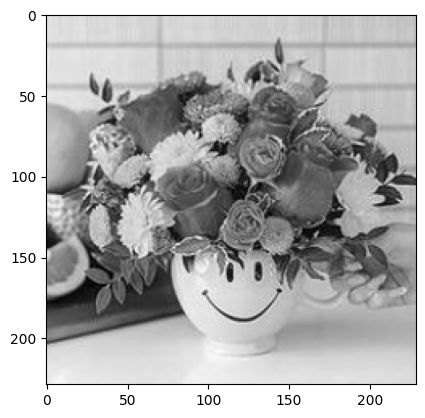

In [16]:
from PIL import Image
import numpy as np

# Number of records/images
num_images = len(imgs)
print("Number of images:", num_images)

# Convert first image to array to check number of features
first_image_array = np.array(imgs[0].convert("L"))  # convert to grayscale
num_features = first_image_array.size  # total pixels
print("Number of features per image:", num_features)

# Optionally look at first few labels
print("First few labels:", labels[:5])

# Optionally display the first image
import matplotlib.pyplot as plt
plt.imshow(first_image_array, cmap="gray")
plt.show()


### Create Image Features

It seems like we have actual `PIL` image objects and their labels. 

This will work to our advantage because if we try to just create a `DataFrame` of the extracted pixels from these images we'll probably have a problem with missing feature values again.

In [17]:
features = []
for img in imgs:
  features.append(get_pixels(img))

print(len(features), len(features[0]), len(features[11]))

features_df = pd.DataFrame(features)
features_df

127 52441 43681


,0,1,2,3,4,5,6,7,8,9,...,66039,66040,66041,66042,66043,66044,66045,66046,66047,66048
0,"(217, 216, 222)","(221, 220, 226)","(223, 222, 228)","(219, 218, 224)","(217, 216, 222)","(219, 218, 224)","(219, 218, 224)","(218, 217, 223)","(212, 211, 217)","(215, 214, 220)",...,None,None,None,None,None,None,None,None,None,None
1,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)",...,None,None,None,None,None,None,None,None,None,None
2,"(147, 173, 76)","(119, 146, 52)","(100, 128, 41)","(69, 98, 21)","(113, 142, 71)","(87, 117, 53)","(65, 95, 35)","(88, 118, 60)","(117, 144, 87)","(110, 134, 75)",...,None,None,None,None,None,None,None,None,None,None
3,"(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(53, 106, 156)","(55, 108, 158)","(55, 108, 158)",...,None,None,None,None,None,None,None,None,None,None
4,"(76, 123, 141)","(49, 96, 114)","(61, 109, 124)","(60, 108, 122)","(53, 100, 112)","(74, 119, 129)","(61, 104, 111)","(59, 101, 105)","(71, 110, 111)","(94, 128, 130)",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,"(22, 75, 187)","(22, 75, 187)","(22, 75, 187)","(22, 75, 187)","(22, 75, 187)","(22, 75, 187)","(22, 75, 187)","(23, 76, 188)","(23, 76, 188)","(23, 76, 188)",...,None,None,None,None,None,None,None,None,None,None
123,"(43, 47, 32)","(10, 17, 0)","(18, 32, 6)","(33, 55, 19)","(55, 82, 41)","(38, 72, 22)","(12, 53, 0)","(75, 119, 58)","(64, 108, 45)","(125, 166, 106)",...,None,None,None,None,None,None,None,None,None,None
124,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)",...,None,None,None,None,None,None,None,None,None,None
125,"(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)","(251, 248, 255)",...,None,None,None,None,None,None,None,None,None,None


### Fix Images

We could follow a similar approach to how we fixed the audio data, and just slice our pixel arrays to have the same length as the shortest pixel array, but that will distort our images. Try it out to see the result, but instead of taking pixels out from the end of the image, what we really have to do is change their dimensions so they all have the same `width` and `height` before we get their pixels.

There are a couple of ways to achieve this:
- Crop: use the `image.crop()` function to cut the images.
- Resize: use `image.resize()` to stretch/squeeze the images into specific shapes.

Documentation for [`crop()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop) and [`resize()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize).

Take a look at a few images before picking a strategy and then take a look after to see what the chosen strategy does to the images.

In [18]:
# Check width and height of first few images
for i, img in enumerate(imgs[:5]):
    print(f"Image {i} dimensions (width x height): {img.size}")


Image 0 dimensions (width x height): (229, 229)
Image 1 dimensions (width x height): (194, 194)
Image 2 dimensions (width x height): (165, 165)
Image 3 dimensions (width x height): (221, 221)
Image 4 dimensions (width x height): (166, 166)


In [19]:
target_size = (100, 100)  # width, height

resized_imgs = [img.resize(target_size) for img in imgs]

# Verify new sizes
for i, img in enumerate(resized_imgs[:5]):
    print(f"Resized Image {i} dimensions: {img.size}")


Resized Image 0 dimensions: (100, 100)
Resized Image 1 dimensions: (100, 100)
Resized Image 2 dimensions: (100, 100)
Resized Image 3 dimensions: (100, 100)
Resized Image 4 dimensions: (100, 100)


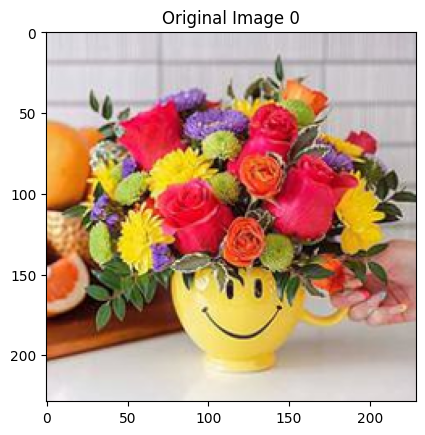

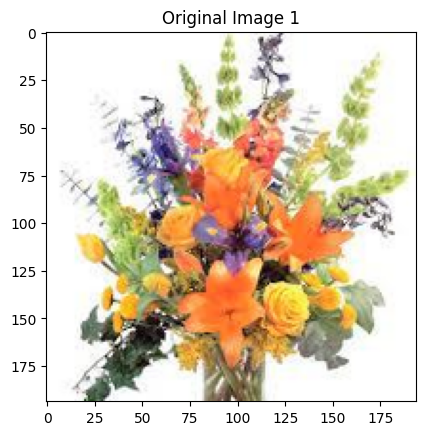

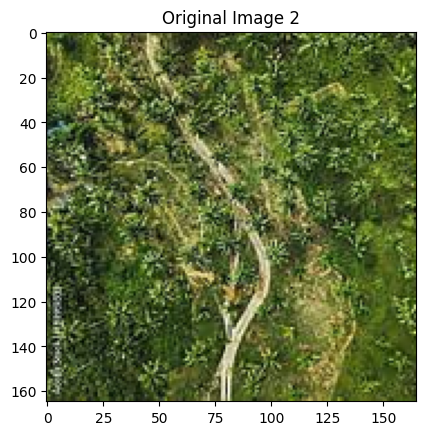

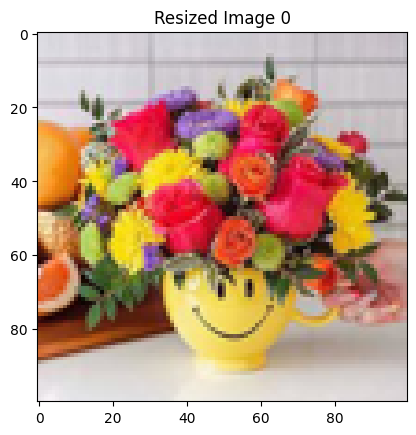

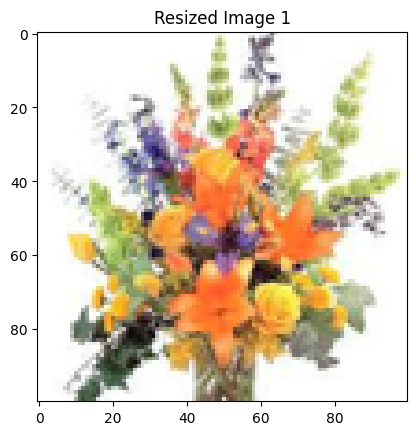

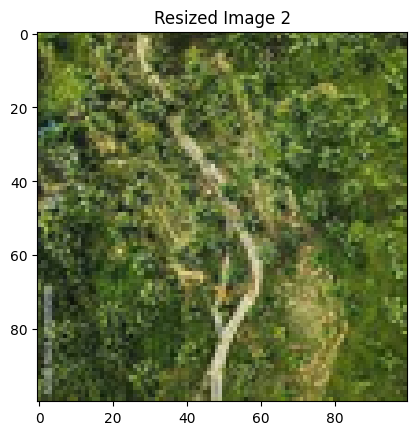

In [20]:

# Original images
for i in range(3):
    plt.imshow(np.array(imgs[i]), cmap='gray')
    plt.title(f"Original Image {i}")
    plt.show()

# Resized images
for i in range(3):
    plt.imshow(np.array(resized_imgs[i]), cmap='gray')
    plt.title(f"Resized Image {i}")
    plt.show()


### Create Features

Now that we have images with consistent dimensions, we can extract their pixels and convert them to grayscale, so we get a nice looking `DataFrame` to send to our classifier model.

In [21]:
# Extract grayscale pixels for each resized image
features = [get_pixels(img.convert("L")) for img in resized_imgs]  # "L" mode is grayscale

# Check length of feature vectors for first few images
for i in range(3):
    print(f"Image {i} feature vector length: {len(features[i])}")


Image 0 feature vector length: 10000
Image 1 feature vector length: 10000
Image 2 feature vector length: 10000


In [23]:
# Convert all images to grayscale and then extract pixels
features = [get_pixels(img.convert("L")) for img in resized_imgs]  # "L" = grayscale

# Now features[i] is a flat list of numbers
for i in range(3):
    make_image(features[i], width=100, height=100)


In [24]:

features_df = pd.DataFrame(features)
print("DataFrame shape:", features_df.shape)
features_df.head()


DataFrame shape: (127, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,220,220,219,215,217,217,215,217,219,221,...,218,218,218,218,217,217,216,215,214,216
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,138,102,97,100,108,104,64,65,72,66,...,96,103,74,60,78,83,79,75,79,68
3,96,96,96,97,98,98,98,97,97,97,...,6,7,6,4,7,4,3,2,0,0
4,96,94,88,97,94,98,92,125,133,96,...,40,48,22,10,7,7,11,8,16,61


### Run the Image Model

Now that we have a `DataFrame` with consistent features, we can fit and evaluate our model.

The next cell runs the pre-defined classification model, fitting it with our `features_df` `DataFrame` and then reports the accuracy of our model.

We just have to run it (and wait a bit because it can take up to $20$ seconds for it to run).

In [25]:
# Fit the classifier and report training accuracy
AwesomeImageClassifier.fit(features_df, labels)

training accuracy: {'florist': 0.95833, 'forest': 1.0, 'tree': 0.775, 'overall': 0.91111}


### Scaling / Normalizing

Run the classifier model again, but this time using normalized features.

In [26]:


# 1. Create scaler object
scaler = StandardScaler()

# 2. Fit and transform the features
features_scaled = scaler.fit_transform(features_df)

# 3. Create a new DataFrame with scaled features (optional)
features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)

# 4. Fit the classifier with normalized features
AwesomeImageClassifier.fit(features_scaled_df, labels)




training accuracy: {'florist': 0.97917, 'forest': 1.0, 'tree': 0.8, 'overall': 0.92639}


### Interpretation

<span style="color:hotpink;">
Do different scaling strategies influence the prediction results ? What might that tell us about our data ?
</span>

<span style="color:hotpink;">
Yes, different scaling strategies can influence the prediction results. Standardizing the features (mean 0, standard deviation 1) or normalizing them to a 0–1 range can change the relative weighting of pixel values in the model. If scaling improves accuracy, it suggests that the raw pixel values vary widely in magnitude and some features dominate the model’s learning. On the other hand, if scaling doesn’t change performance much, it indicates that the model is robust to differences in pixel intensity ranges, or that the important patterns are preserved regardless of absolute values.
</span>